In [12]:
from qiskit import QuantumCircuit, transpile,QuantumRegister
from qiskit.visualization import plot_bloch_multivector, plot_state_city
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, ClassicalRegister
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_state_city
import numpy as np
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram
%matplotlib inline

In [13]:


N = 3  # number of users
bits = [(1,0),(0,1),(1,1)]  # user messages

q = QuantumRegister(2*N, 'q')
c = ClassicalRegister(2*N, 'c')
qc = QuantumCircuit(q, c)

# Create Bell pairs
for i in range(N):
    qc.h(q[2*i])       # H on sender qubit
    qc.cx(q[2*i], q[2*i+1])  # CNOT to receiver qubit


In [14]:
for i, (a,b) in enumerate(bits):
    sender = q[2*i]
    if a == 1:
        qc.z(sender)
    if b == 1:
        qc.x(sender)



In [15]:
from qiskit.circuit.library import QFT

qft = QFT(num_qubits=N, do_swaps=False).to_gate()
qft.name = "QFT"
qc.append(qft, [q[2*i] for i in range(N)])


In [16]:
from qiskit.circuit.library import QFT

iqft = QFT(num_qubits=N, do_swaps=False).inverse().to_gate()
iqft.name = "IQFT"
qc.append(iqft, [q[2*i] for i in range(N)])


In [17]:
for i in range(N):
    qc.cx(q[2*i], q[2*i+1])
    qc.h(q[2*i])


In [18]:
for i in range(2*N):
    qc.measure(q[i], c[i])


Measurement results (bitstrings):
{'111001': 1024}


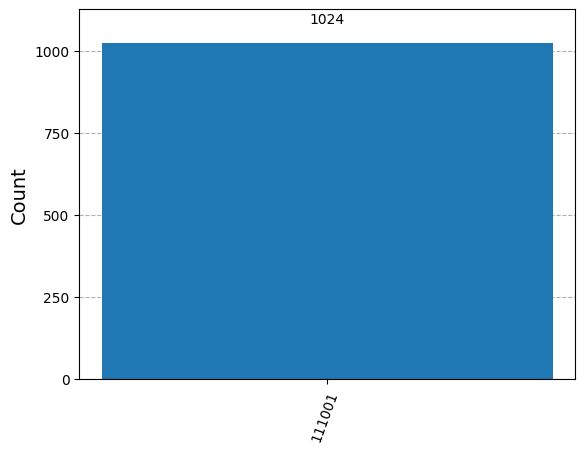

In [19]:
sim = AerSimulator()
compiled = transpile(qc, sim)
result = sim.run(compiled, shots=1024).result()
counts = result.get_counts()

print("Measurement results (bitstrings):")
print(counts)
plot_histogram(counts)
plt.show()


Measurement results (bitstrings):
{'00111001': 1024}


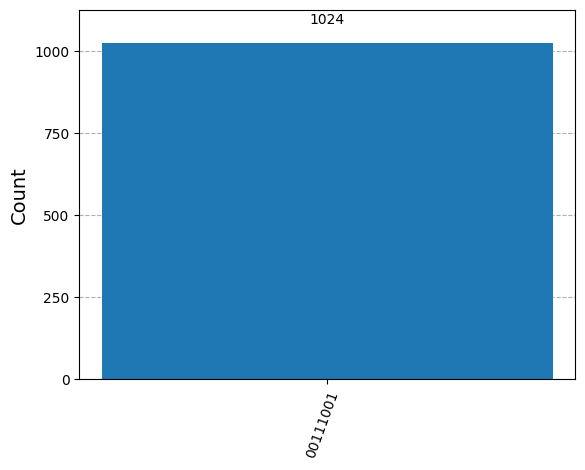

In [20]:
from qiskit import QuantumCircuit, transpile,QuantumRegister
from qiskit.visualization import plot_bloch_multivector, plot_state_city
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, ClassicalRegister
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_state_city
import numpy as np
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram
%matplotlib inline

# Number of users
N = 4
# Classical messages for each user (a_i, b_i)
bits = [(1,0), (0,1), (1,1), (0,0)]

# Quantum and Classical Registers
q = QuantumRegister(2*N, 'q')
c = ClassicalRegister(2*N, 'c')
qc = QuantumCircuit(q, c)

# --- STEP 1: Create Bell pairs ---
for i in range(N):
    qc.h(q[2*i])           # H on sender qubit
    qc.cx(q[2*i], q[2*i+1]) # CNOT to receiver qubit

# --- STEP 2: Superdense encoding ---
for i, (a,b) in enumerate(bits):
    sender = q[2*i]
    if a == 1:
        qc.z(sender)
    if b == 1:
        qc.x(sender)

# --- STEP 3: QFT for multiplexing ---
qft = QFT(num_qubits=N, do_swaps=False).to_gate()
qft.name = "QFT"
qc.append(qft, [q[2*i] for i in range(N)])  # Apply QFT on sender qubits

# --- STEP 4: Inverse QFT ---
iqft = QFT(num_qubits=N, do_swaps=False).inverse().to_gate()
iqft.name = "IQFT"
qc.append(iqft, [q[2*i] for i in range(N)])  # Apply IQFT on sender qubits

# --- STEP 5: Superdense decoding ---
for i in range(N):
    qc.cx(q[2*i], q[2*i+1])
    qc.h(q[2*i])

# --- STEP 6: Measurement ---
for i in range(2*N):
    qc.measure(q[i], c[i])

# --- Run simulation ---
sim = AerSimulator()
compiled = transpile(qc, sim)
result = sim.run(compiled, shots=1024).result()
counts = result.get_counts()

print("Measurement results (bitstrings):")
print(counts)
plot_histogram(counts)
plt.show()


Measurement results (bitstrings):
{'0100111001': 1024}


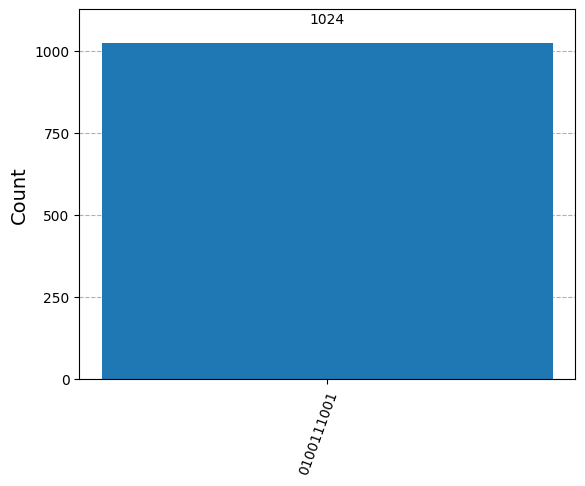

Recovered classical messages (reversed user order):
[(1, 0), (0, 1), (1, 1), (0, 0), (1, 0)]


In [22]:
from qiskit import QuantumCircuit, transpile,QuantumRegister
from qiskit.visualization import plot_bloch_multivector, plot_state_city
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, ClassicalRegister
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_state_city
import numpy as np
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram
%matplotlib inline

# --------------------------
# USER PARAMETERS
# --------------------------
N = 5  # number of users (change as needed)
# Example messages: list of tuples (a_i, b_i) for each user
# Length must be N
bits = [(1,0), (0,1), (1,1), (0,0), (1,0)]

# --------------------------
# CREATE REGISTERS
# --------------------------
q = QuantumRegister(2*N, 'q')  # 2 qubits per user: sender + receiver
c = ClassicalRegister(2*N, 'c')
qc = QuantumCircuit(q, c)

# --------------------------
# STEP 1: Create Bell pairs
# --------------------------
for i in range(N):
    qc.h(q[2*i])           # Hadamard on sender qubit
    qc.cx(q[2*i], q[2*i+1])  # CNOT to receiver qubit

# --------------------------
# STEP 2: Superdense encoding
# --------------------------
for i, (a,b) in enumerate(bits):
    sender = q[2*i]
    if a == 1:
        qc.z(sender)
    if b == 1:
        qc.x(sender)

# --------------------------
# STEP 3: Apply QFT for multiplexing
# --------------------------
qft = QFT(num_qubits=N, do_swaps=False).to_gate()
qft.name = "QFT"
qc.append(qft, [q[2*i] for i in range(N)])  # QFT on sender qubits

# --------------------------
# STEP 4: Apply inverse QFT
# --------------------------
iqft = QFT(num_qubits=N, do_swaps=False).inverse().to_gate()
iqft.name = "IQFT"
qc.append(iqft, [q[2*i] for i in range(N)])  # IQFT on sender qubits

# --------------------------
# STEP 5: Superdense decoding
# --------------------------
for i in range(N):
    qc.cx(q[2*i], q[2*i+1])
    qc.h(q[2*i])

# --------------------------
# STEP 6: Measure all qubits
# --------------------------
for i in range(2*N):
    qc.measure(q[i], c[i])

# --------------------------
# Run simulation
# --------------------------
sim = AerSimulator()
compiled = transpile(qc, sim)
result = sim.run(compiled, shots=1024).result()
counts = result.get_counts()

print("Measurement results (bitstrings):")
print(counts)
plot_histogram(counts)
plt.show()

# --------------------------
# Recover classical messages per user
# --------------------------
# Measurement order: [top0,bottom0, top1,bottom1,...]
recovered = []
for i in range(N):
    bit_sender = None
    bit_receiver = None
    # Find most probable bit (majority vote from counts)
    # Here we just take first key in counts for simplicity
    key = list(counts.keys())[0]
    bit_sender = int(key[2*i])      # top qubit
    bit_receiver = int(key[2*i+1])  # bottom qubit
    recovered.append((bit_receiver, bit_sender))  # reversed per user

# Optional: reverse entire user order
recovered = recovered[::-1]

print("Recovered classical messages (reversed user order):")
print(recovered)


In [23]:
# Existing list
bits = []

# Ask user for input for one user
a = int(input("Enter first bit (a): "))
b = int(input("Enter second bit (b): "))

# Create tuple and append
bits.append((a, b))

print(bits)

Enter first bit (a):  0
Enter second bit (b):  1


[(0, 1)]


In [25]:
# Existing list
bits = []

# Ask user for input for one user
N=int(input("Enter the No of user=: "))
for i in range(0,N):
    
    a = int(input("Enter first bit (a): "))
    b = int(input("Enter second bit (b): "))

    # Create tuple and append
    bits.append((a, b))

print(bits)

Enter the No of user=:  3
Enter first bit (a):  0
Enter second bit (b):  1
Enter first bit (a):  1
Enter second bit (b):  0
Enter first bit (a):  1
Enter second bit (b):  1


[(0, 1), (1, 0), (1, 1)]
